# Hands-on of Basic Machine Learning Classification Algorithms

## Algo that I will try hands on:
- Classification using Perceptron Model
- Classification using Logisitc Regression
- Classification using SVM
- Classification using simple decision tree
- Classification using Random Forests
- Classification using KNN

with their respective accuracy

In [ ]:
import pandas as pd
import numpy as no
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Loading Iris Dataset

In [22]:
from sklearn import datasets
iris_data = datasets.load_iris()

# Converting dataset to pandas dataframe
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['target'] = iris_data['target']
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Visualizing data


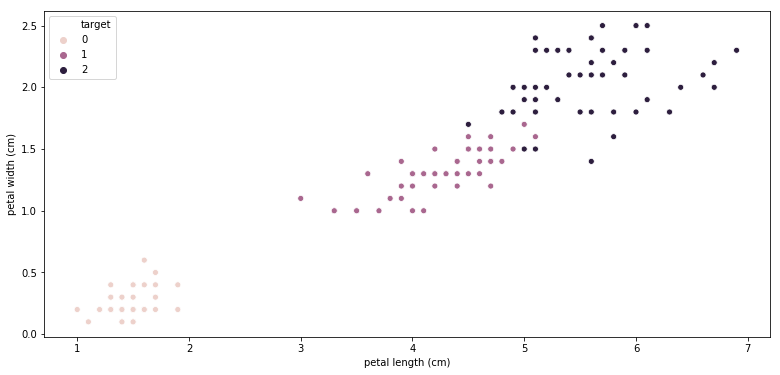

In [25]:
plt.figure(figsize=(13,6))
sns.scatterplot(iris_df['petal length (cm)'],iris_df['petal width (cm)'],hue=iris_df['target'])

### Using Percpetron Model and Feature scaling

In [35]:
# Spliting Dataset

from sklearn.model_selection import train_test_split
features = [x for x in iris_df.columns]
features.remove('target')

X_train, X_test, Y_train, Y_test = train_test_split(iris_df[features],iris_df['target'], test_size=0.25, random_state=0)

# Features Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_standard = sc.transform(X_train)
X_test_standard = sc.transform(X_test)

print("X_train without standardising features")
print(X_train)

print("X_train with standardising features")
print(X_train_standard)

X_train without standardising features
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
61                 5.9               3.0                4.2               1.5
92                 5.8               2.6                4.0               1.2
112                6.8               3.0                5.5               2.1
2                  4.7               3.2                1.3               0.2
141                6.9               3.1                5.1               2.3
43                 5.0               3.5                1.6               0.6
10                 5.4               3.7                1.5               0.2
60                 5.0               2.0                3.5               1.0
116                6.5               3.0                5.5               1.8
144                6.7               3.3                5.7               2.5
119                6.0               2.2                5.0               1.5
108                6.7   

### Appying Perceptron Model


In [38]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter = 40, eta0 = 0.1, random_state = 0)
ppn.fit(X_train_standard, Y_train)

C:\Users\kande\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=None, n_iter=40, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
## Checking Accuracy on unseen data

Y_pred_percep = ppn.predict(X_test_standard)

from sklearn.metrics import accuracy_score

print("Accuracy: %.2f" %accuracy_score(Y_test, Y_pred_percep))

Accuracy: 0.87


## Main disadvantage with Perceptron Model was it never converges if data is not linearly separable